In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,Lasso,LassoCV
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://gist.githubusercontent.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad/raw/d9bcf657f97201394a59fffd801c44347eb7e28d/Hitters.csv'

In [3]:
df = pd.read_csv(url, error_bad_lines=False)

In [4]:
df = df.rename(columns={'Unnamed: 0':'Name'})
df = df.dropna()

In [5]:
X_linear = df.drop(['Name','League','Division','NewLeague','Salary'],axis=1)
y = df['Salary'].values.reshape(-1,1)

In [6]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_linear, y, test_size=0.3)
features = X_train.columns.values
features=list(features)
# Define SSE calculation function
def sse(resid):
    return np.sum(resid**2)

## First, let's try the linear regression model

In [8]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
# Calculate SSE for the linear regression model
resid_train = y_train - lin_reg.predict(X_train)
sse_train = sse(resid_train)
resid_test = y_test - lin_reg.predict(X_test)
sse_test = sse(resid_test)
print('train sse:', sse_train, 'test sse:', sse_test)

train sse: 16877168.80417554 test sse: 10924299.864915572


The SSE is very big, let's scale the data.

In [12]:
scaler =  StandardScaler()
X_linear = scaler.fit_transform(X_linear)
y = scaler.fit_transform(y)
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.fit_transform(y_test)

In [13]:
# Try the linear regression model again
lin_reg_1 = LinearRegression()
lin_reg_1.fit(X_train, y_train)
resid_train = y_train - lin_reg_1.predict(X_train)
sse_train = sse(resid_train)
resid_test = y_test - lin_reg_1.predict(X_test)
sse_test = sse(resid_test)
print('train sse:', sse_train, 'test sse:', sse_test)

train sse: 86.68981159531252 test sse: 54.00478008782899


SSE is much smaller now.

#### 1.1 Use LASSO regression to predict Salary from the other numeric predictors. Create a visualization of the coefficient trajectories. Comment on which are the final three predictors that remain in the model. Use cross-validation to find the optimal value of the regularization penality. How many predictors are left in that model?

## LASSO model

In [14]:
# model_lasso = Lasso(alpha=10.0)
# model_lasso.fit(X_train, y_train)
# resid_train = y_train - model_lasso.predict(X_train)
# sse_train = sse(resid_train)
# resid_test = y_test - model_lasso.predict(X_test)
# sse_test = sse(resid_test)
# print('train sse:', sse_train, 'test sse:', sse_test)

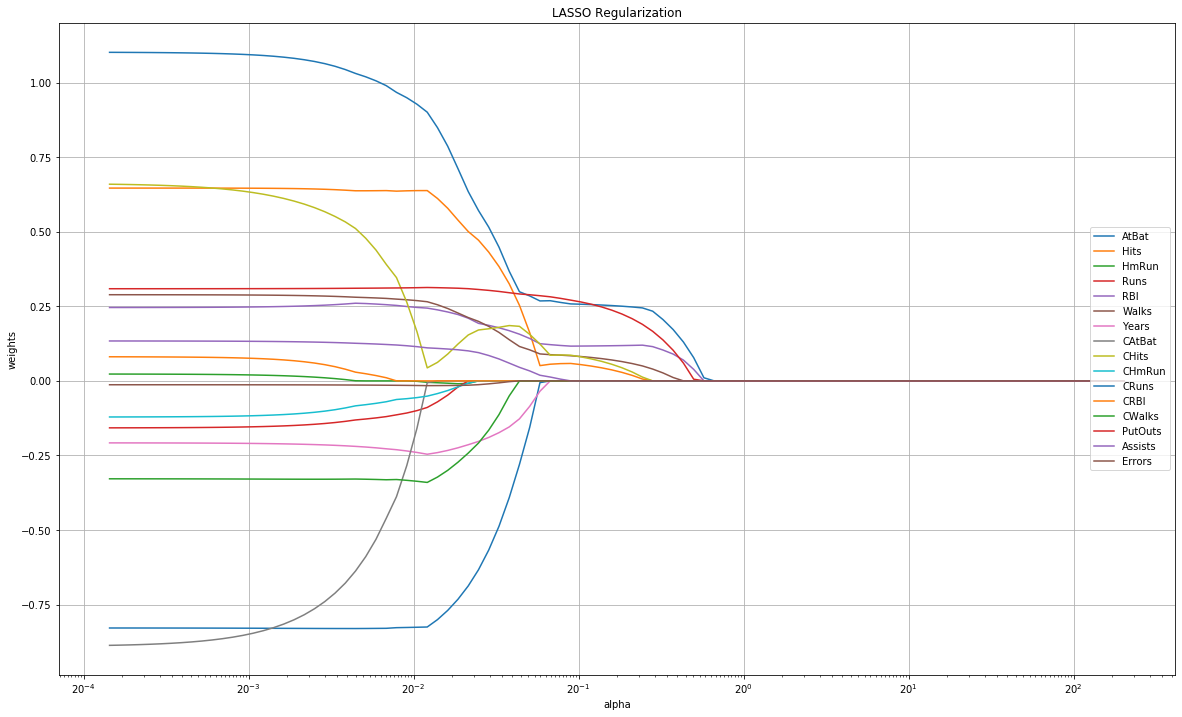

In [15]:
alphas = np.logspace(-5, 3, 100)
coeffs = np.zeros((len(alphas), X_train.shape[1]))


for n, alpha in enumerate(alphas):
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    coeffs[n, :] = model.coef_
    
# Display results

ax = plt.gca()

ax.plot(alphas, coeffs)
ax.set_xscale('log', basex = 20)
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('LASSO Regularization')
plt.axis('tight')
plt.grid(True)
plt.legend(features, loc = 'right')
fig = plt.gcf()
fig.set_size_inches(20, 12)
fig.savefig('Lasso.png', dpi=100)
plt.show()

From the above graph, we could know that the final three predictors are AtBat, Assists and PutOuts .

In [16]:
from sklearn import linear_model
model_lasso_best = linear_model.LassoCV()
model_lasso_best.fit(X_linear, y)
print('best alpha:', model_lasso_best.alpha_)
resid_train = y_train - model_lasso_best.predict(X_train)
sse_train = sse(resid_train)
resid_test = y_test - model_lasso_best.predict(X_test)
sse_test = sse(resid_test)
print('train sse:', sse_train, 'test sse:', sse_test)

best alpha: 0.0074949526958622914
train sse: 50201.141227691434 test sse: 9069.096677997857


In [17]:
model_lasso_best.coef_

array([-0.51452076,  0.5823832 , -0.        ,  0.        ,  0.01057061,
        0.21762236, -0.08901661, -0.        ,  0.        ,  0.09369185,
        0.47326638,  0.22865397, -0.25506588,  0.17167888,  0.05062165,
       -0.02203237])

The best alpha is 0.0075. From the coefficient chart, all non-zero coefficients are left in the model. Therefore, there are 12 final predictor.

#### 1.2 Repeat with Ridge Regression. Visualize coefficient trajectories. Use cross-validation to find the optimal vaule of the regularization penalty.

## Ridge model

In [18]:
# model_ridge = Ridge(alpha=2.5)
# model_ridge.fit(X_train, y_train)

# resid_train = y_train - model_ridge.predict(X_train)
# sse_train = sse(resid_train)
# resid_test = y_test - model_ridge.predict(X_test)
# sse_test = sse(resid_test)
# print('train sse:', sse_train, 'test sse:', sse_test)

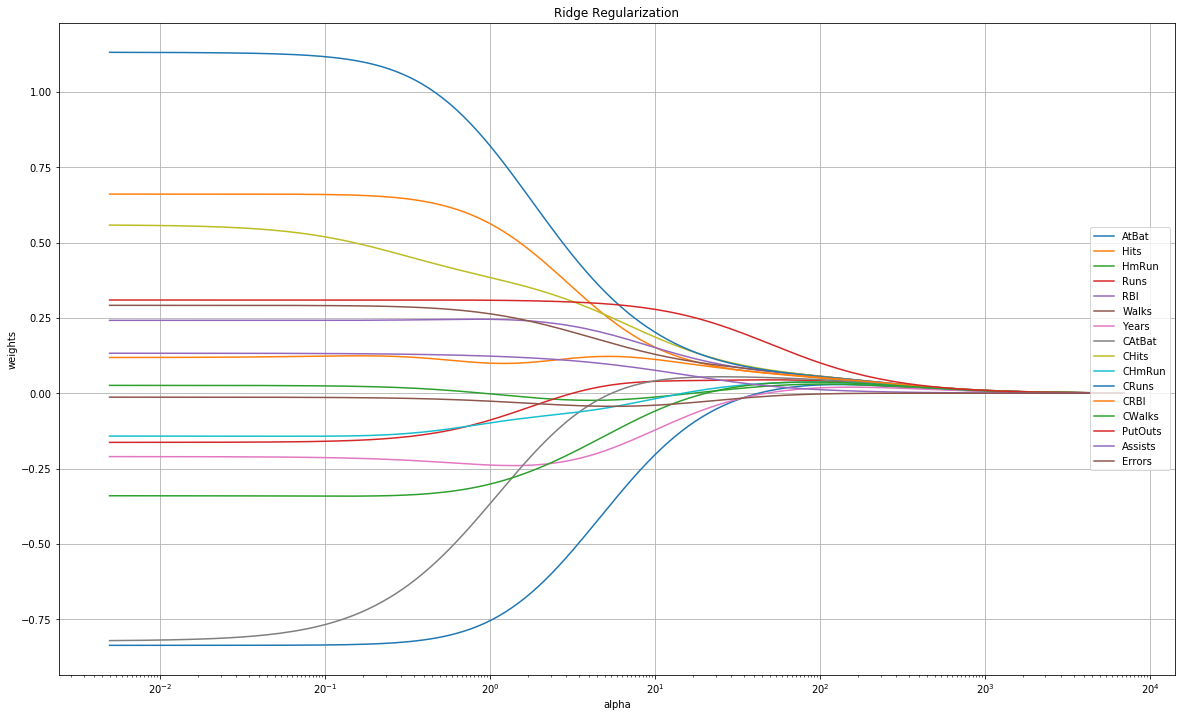

In [19]:
alphas = np.logspace(-3, 5, 150)
coeffs = np.zeros((len(alphas), X_train.shape[1]))
sse_train = np.zeros_like(alphas)
sse_test = np.zeros_like(alphas)

for n, alpha in enumerate(alphas):
    model = linear_model.Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    coeffs[n, :] = model.coef_


# Display results

ax = plt.gca()

ax.plot(alphas, coeffs)
ax.set_xscale('log', basex = 20)
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge Regularization')
plt.axis('tight')
plt.grid(True)
plt.legend(features, loc = 'right')
fig = plt.gcf()
fig.set_size_inches(20, 12)
fig.savefig('Ridge.png', dpi=100)
plt.show()

In [20]:
model_ridge_best = linear_model.RidgeCV()
model_ridge_best.fit(X_linear, y)
print('best alpha:', model_ridge_best.alpha_)
resid_train = y_train - model_ridge_best.predict(X_train)
sse_train = sse(resid_train)
resid_test = y_test - model_ridge_best.predict(X_test)
sse_test = sse(resid_test)
print('train sse:', sse_train, 'test sse:', sse_test)

best alpha: 1.0
train sse: 94.71049994736919 test sse: 30.95277971561728


When alpha = 1, we have the best model. The coefficients are:

In [21]:
model_ridge_best.coef_

array([[-0.66685875,  0.68072733, -0.0024436 , -0.04118764,  0.03760831,
         0.27012647, -0.07676767, -0.54138165,  0.24808807,  0.08942636,
         0.78295584,  0.33162091, -0.3901252 ,  0.18179833,  0.10999909,
        -0.04686668]])

#### 2. Short Answer. Explain in your own words the bias-variance tradeoff. What role does regularization play in this tradeoff? Make reference to your findings in number (1) to describe models of high/low bias and variance.

When we conduct a model, we always face the bias-variance tradeoff situation. When the model is underfitting,the model is not good enough to capture all features so we have high bias. Since the underfitting model captures part of the features even if we change the testing set, it has low variances.  

When the model is overfitting, it is good enough to capture most of the features even some noise. So it has low bias. Once the testing set is changed, the part of the model which captures previous noises will generate high variances.

Regularization is method to avoid overfitting. The penality term is adpotted to constrain the parameters from being too large or too small. As the penalty term increases, the training MSE will keep increasing, whereas the testing MSE will decreases first until it hits the optimal penalty value, and then increases.


In the linear regression model from Part 1, the training SSE is smaller than the testing MSE, which implies that there might be an overfitting issue. After the Ridge Regularization, the testing SSE has been decreased, indicating that the overfitting problem has been modified.

In [52]:
# df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,535.925882
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,451.118681
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,190.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,425.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,2460.000000
